### Skills Trends

##### How are the top skills trending throughout the year?

1. Aggragate the Skill Counts monthly
2. Reanalyze based on percentage of total jobs
3. Plot the Monthly Skill Demand

In [ ]:

# Importing Libraries
import ast
import adjustText as adjust_text
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df['month'] = df['job_posted_date'].dt.to_period(freq = 'M')




month
2023-01    91822
2023-08    75162
2023-10    66611
2023-02    64578
2023-11    64450
2023-03    64084
2023-07    63777
2023-04    62919
2023-09    62359
2023-06    61572
2023-12    56303
2023-05    52104
Freq: M, Name: count, dtype: int64

In [57]:
# Get the total postins in each month from the df BEFOREexploding
# Merge total job postings with exploded
month_total =  df['month'].value_counts()

df_skills = df.explode('job_skills')

df_skills['month'] = df_skills['job_posted_date'].dt.month

month_total.reset_index()
skill_mon_gby = df_skills.groupby('month')['job_skills'].value_counts().sort_values(ascending=False)
skill_mon_gby = skill_mon_gby.reset_index()

da_top_skill = df_skills[df_skills['job_title_short'] =='Data Analyst']
da_top_skill_list = list(da_top_skill['job_skills'].value_counts().head().index)
skill_mon_gby



,month,job_skills,count
0,1,sql,45774
1,1,python,44889
2,8,sql,36699
3,8,python,36228
4,2,sql,32720
...,...,...,...
2848,8,chainer,1
2849,8,ember.js,1
2850,8,homebrew,1
2851,8,microsoft lists,1


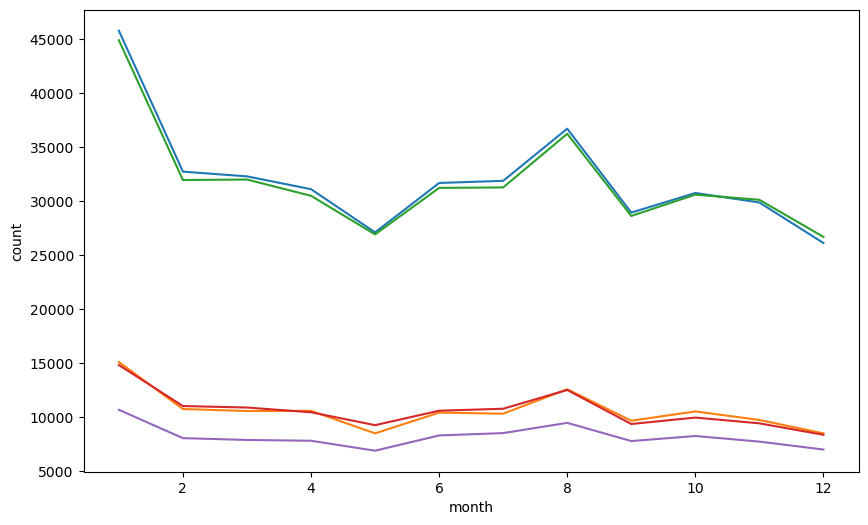

In [59]:
plt.figure(figsize= (10,6))
for i, skill in enumerate(da_top_skill_list):
    plot = skill_mon_gby[skill_mon_gby['job_skills'] == skill]
    plot = plot.reset_index()
    sns.lineplot(data=plot, x='month', y= 'count')
    
